In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

c:\users\user\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
web = requests.get('https://www.basketball-reference.com/leagues/NBA_stats_per_game.html')

In [3]:
content = web.content

In [4]:
soup = BeautifulSoup(content,'html.parser')

In [6]:
html = soup.find(name='div',attrs={'id':'div_stats'})

In [9]:
data = pd.read_html(str(html))[0]

In [13]:
data.columns

MultiIndex(levels=[['Advanced', 'Per Game', 'Shooting', 'Unnamed: 0_level_0', 'Unnamed: 1_level_0', 'Unnamed: 2_level_0', 'Unnamed: 3_level_0', 'Unnamed: 4_level_0', 'Unnamed: 5_level_0', 'Unnamed: 6_level_0'], ['3P', '3P%', '3PA', 'AST', 'Age', 'BLK', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FT/FGA', 'FTA', 'G', 'Ht', 'Lg', 'MP', 'ORB', 'ORB%', 'ORtg', 'PF', 'PTS', 'Pace', 'Rk', 'STL', 'Season', 'TOV', 'TOV%', 'TRB', 'Wt', 'eFG%']],
           codes=[[3, 4, 5, 6, 7, 8, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0], [24, 26, 16, 4, 15, 30, 14, 17, 7, 9, 0, 2, 10, 13, 18, 6, 29, 3, 25, 5, 27, 21, 22, 8, 1, 11, 23, 31, 28, 19, 12, 20]])

In [ ]:
a='Rk	Season	Lg	Age	Ht	Wt	G	MP	FG	FGA	3P	3PA	FT	FTA	ORB	DRB	TRB	AST	STL	BLK	TOV	PF	PTS	FG%	3P%	FT%	Pace	eFG%	TOV%	ORB%	FT/FGA	ORtg'

In [17]:
col=a.split('\t')

In [19]:
data.columns=col

In [23]:
data = data[data['Lg'] == 'NBA'].head(30)

In [31]:
pd.options.display.max_columns=50000

In [33]:
data['YEAR']=data['Season'].apply(lambda x:int(x.split('-')[0]))

In [38]:
stat=['G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'ORtg']

In [36]:
for i in stat:
    data[i] = data[i].astype(float)

In [63]:
plt.style.use('fivethirtyeight',)

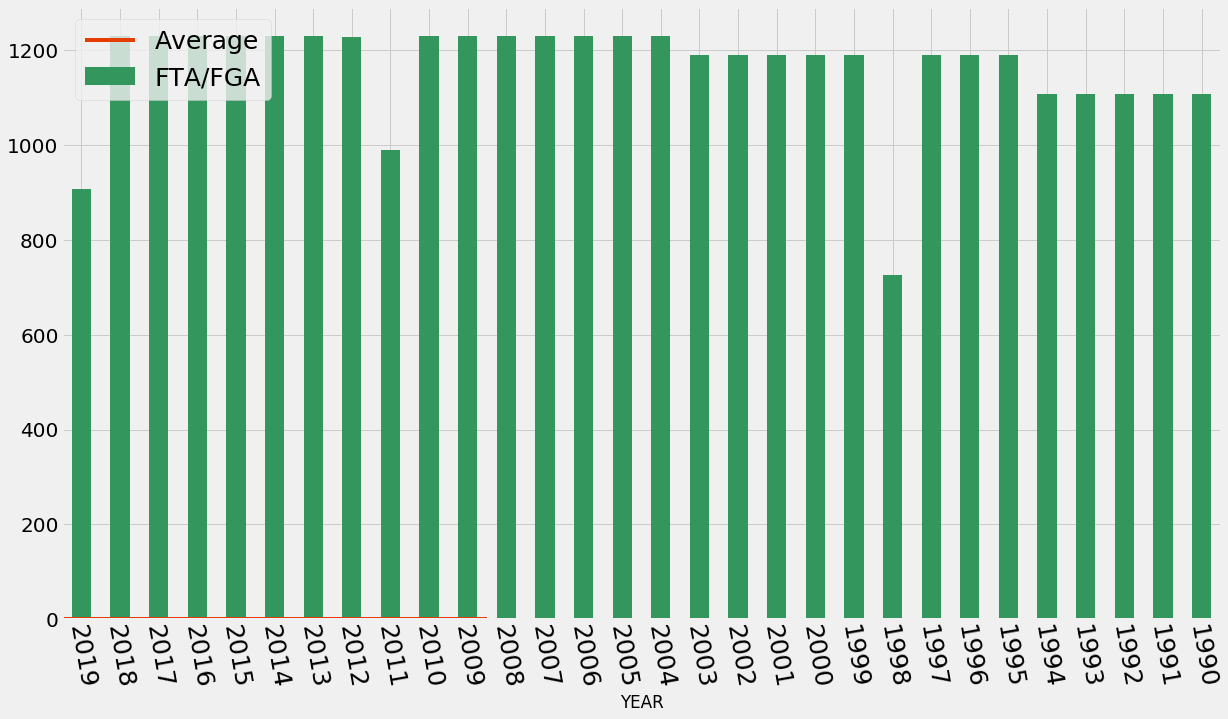

In [65]:
data.plot.bar(x='YEAR',y='G',color='#32965D',width=0.5)
plt.xticks(rotation=-80)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)


plt.hlines(0.22,-1,10.5,linestyles='-',colors='#E53D00',label='Average')

plt.legend(["Average", "FTA/FGA"],loc = 0, prop = {'size':25})

In [59]:
def draw(stat):
    data.plot.line(x='YEAR',y=stat,color='#32965D')

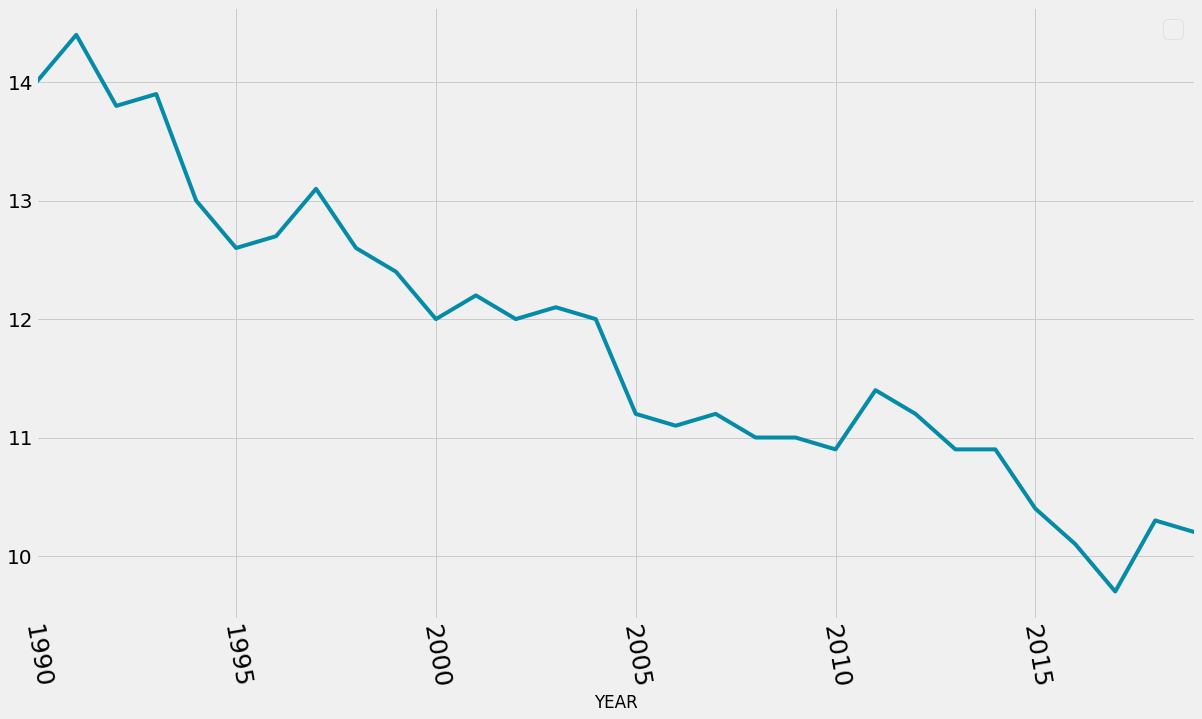

In [274]:
data.plot.line(x='YEAR',y='ORB',color='#048BA8')
plt.xticks(rotation=-80)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)


# plt.hlines(0.22,-1,10.5,linestyles='-',colors='#E53D00',label='Average')

plt.legend([],loc = 0, prop = {'size':25})

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


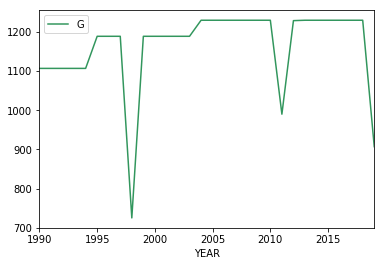

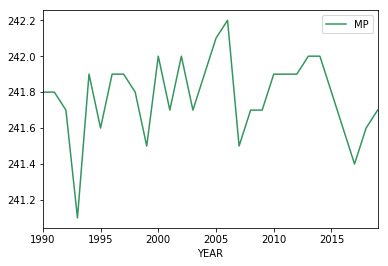

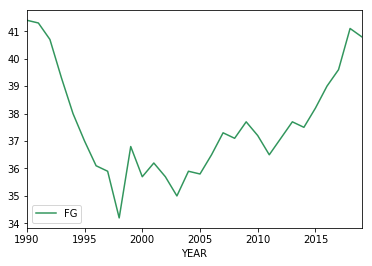

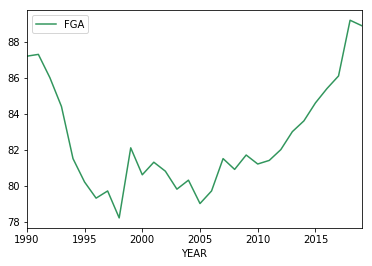

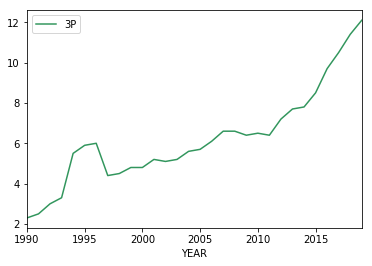

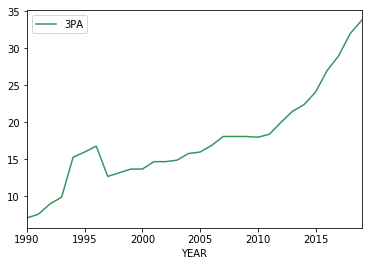

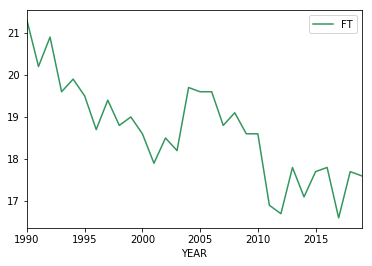

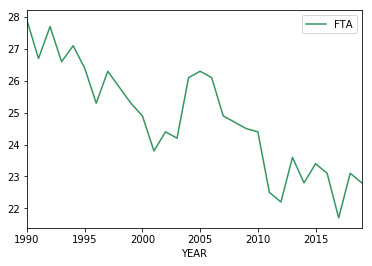

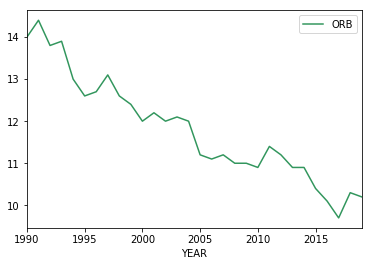

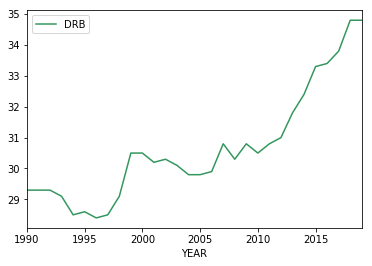

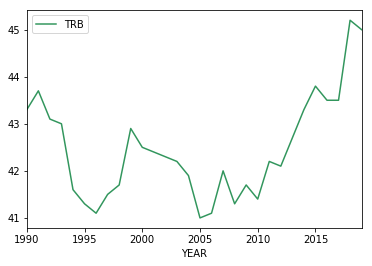

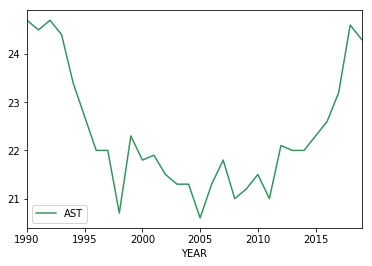

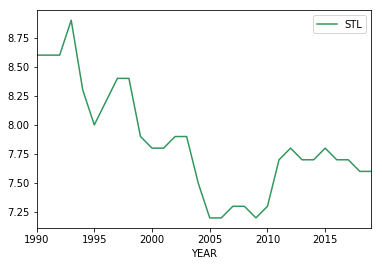

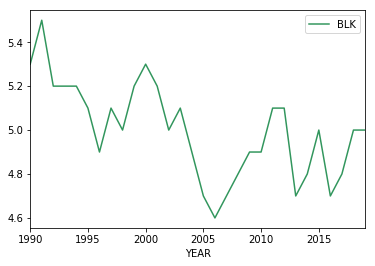

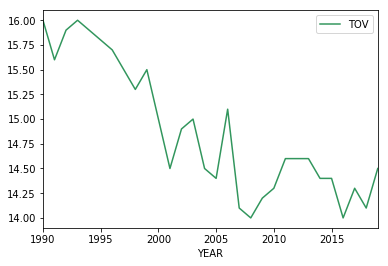

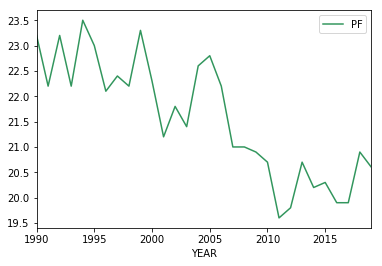

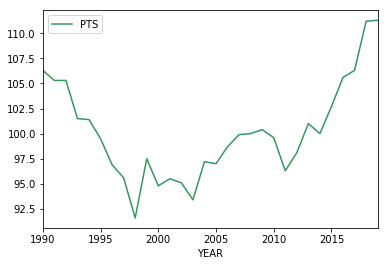

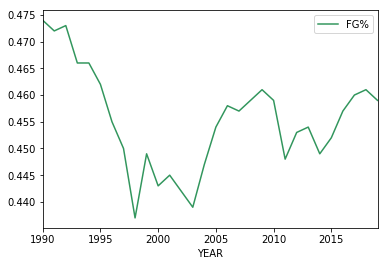

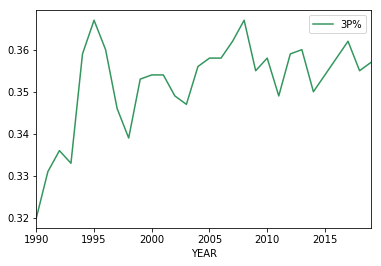

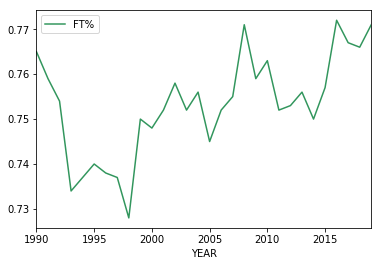

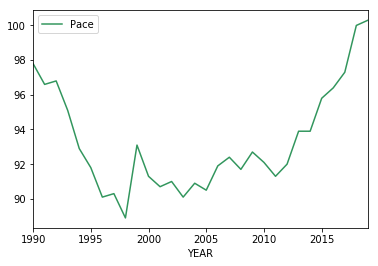

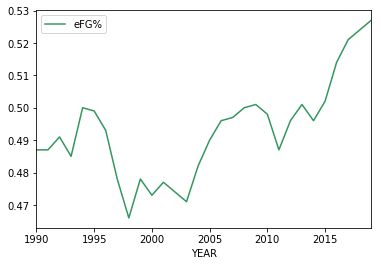

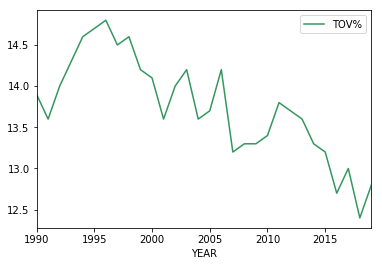

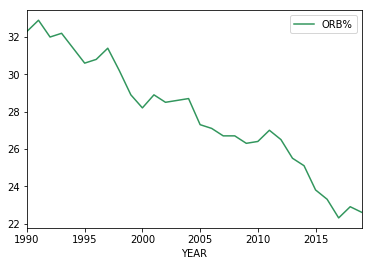

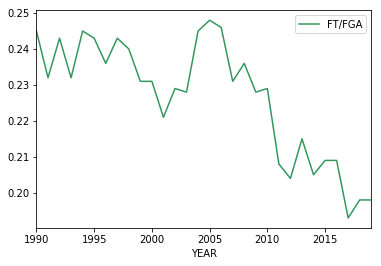

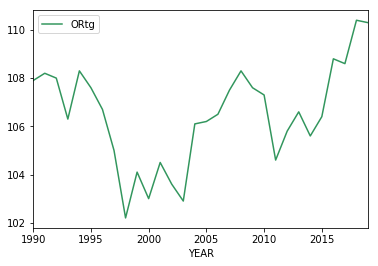

In [61]:
for s in stat:
    draw(s)

In [ ]:
# curve line
x = data['3PA'].values
y = data['ORB'].values
poly = np.polyfit(x,y,3)
p1= np.poly1d(poly)
yvals = p1(x)


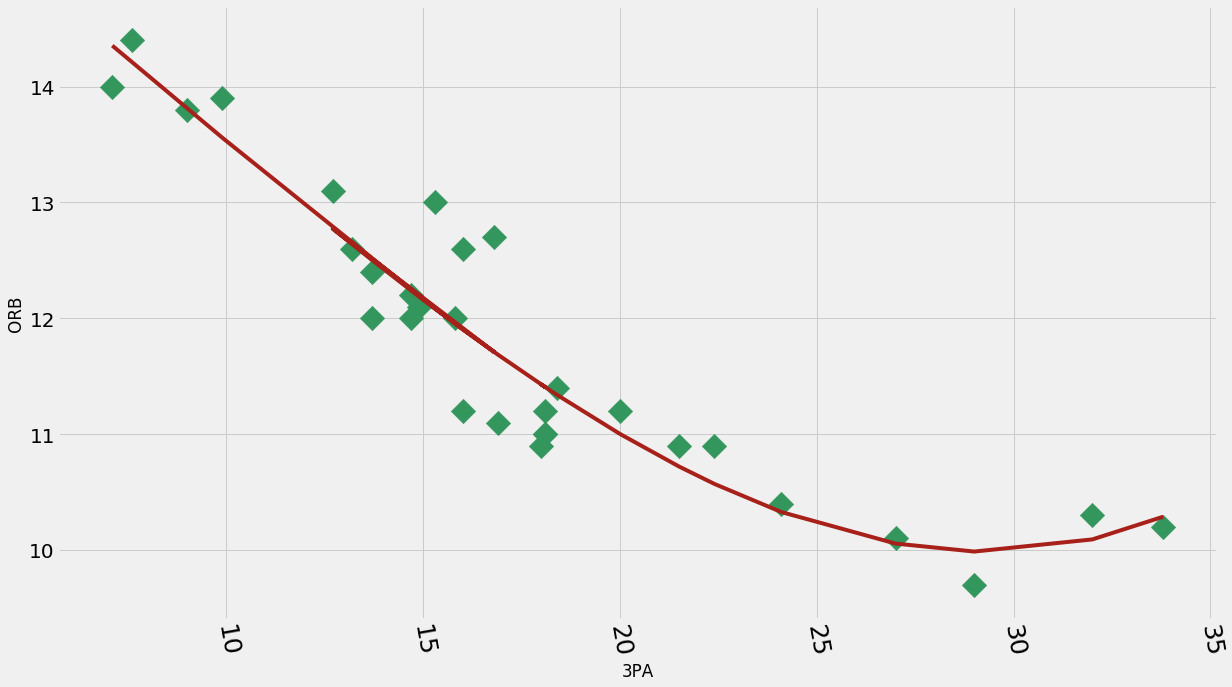

In [110]:
data.plot.scatter(x='3PA',y='ORB',color='#32965D',s=300,marker='D')
plt.xticks(rotation=-80)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.plot(x,yvals,'#A8201A')

# plt.hlines(0.22,-1,10.5,linestyles='-',colors='#E53D00',label='Average')

# plt.legend(["Average", "FTA/FGA"],loc = 0, prop = {'size':25})

In [66]:
data.columns

Index(['Rk', 'Season', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'ORtg', 'YEAR'],
      dtype='object')

In [111]:
web = requests.get('https://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&type=totals&per_minute_base=36&per_poss_base=100&lg_id=NBA&is_playoffs=N&year_min=1991&year_max=2020&franch_id=&season_start=1&season_end=-1&age_min=0&age_max=99&shoot_hand=&height_min=0&height_max=99&birth_country_is=Y&birth_country=&birth_state=&college_id=&draft_year=&is_active=&debut_yr_nba_start=&debut_yr_nba_end=&is_hof=&is_as=&as_comp=gt&as_val=0&award=&pos_is_g=&pos_is_gf=&pos_is_f=&pos_is_fg=&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&qual=&c1stat=&c1comp=&c1val=&c2stat=&c2comp=&c2val=&c3stat=&c3comp=&c3val=&c4stat=&c4comp=&c4val=&c5stat=&c5comp=&c6mult=&c6stat=&order_by=ws&order_by_asc=&offset=3500')

In [113]:
content = web.content

soup = BeautifulSoup(content,'html.parser')

html = soup.find(name='table',attrs={'id':'stats'})

for_concat = pd.read_html(str(html))[0]

In [118]:
st='Rk	Player	Season	Age	Tm	Lg	WS	G	GS	MP	FG	FGA	2P	2PA	3P	3PA	FT	FTA	ORB	DRB	TRB	AST	STL	BLK	TOV	PF	PTS	FG%	2P%	3P%	eFG%	FT%	TS%'

In [121]:
col = st.split('\t')

In [122]:
for_concat.columns=col

for_concat = for_concat[for_concat['Lg']=='NBA']

for_concat['Year'] = for_concat['Season'].apply(lambda x :int(x.split('-')[0]))

for_concat['3PA'] = for_concat['3PA'].astype(int)

In [148]:
for_concat[for_concat['Year']==2007]['3PA'].mean()

3.3333333333333335

In [146]:
for_concat

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year
0,3501,Randolph Morris,2007-08,22,NYK,NBA,-0.2,18,2,181,21,58,21,58,0,0,14,29,12,25,37,2,4,2,9,37,56,.362,.362,NaN,.362,.483,.396,2007
1,3502,Byron Mullens,2010-11,21,OKC,NBA,-0.2,13,0,85,9,28,9,28,0,0,7,14,6,18,24,0,2,3,8,11,25,.321,.321,NaN,.321,.500,.366,2010
2,3503,Michael Olowokandi,2002-03,27,LAC,NBA,-0.2,36,36,1369,186,436,186,436,0,0,69,105,57,271,328,47,18,79,98,110,441,.427,.427,NaN,.427,.657,.457,2002
3,3504,Dino Rađa,1996-97,29,BOS,NBA,-0.2,25,25,874,149,339,149,338,0,1,51,71,44,167,211,48,23,48,70,76,349,.440,.441,.000,.440,.718,.471,1996
4,3505,Kevin Salvadori,1997-98,27,SAC,NBA,-0.2,16,0,87,1,13,1,13,0,0,3,6,5,15,20,3,0,11,5,12,5,.077,.077,NaN,.077,.500,.160,1997
5,3506,Cheikh Samb,2008-09,24,TOT,NBA,-0.2,18,0,83,6,32,6,29,0,3,3,7,10,14,24,1,3,10,3,7,15,.188,.207,.000,.188,.429,.214,2008
6,3507,Ralph Sampson,1991-92,31,WSB,NBA,-0.2,10,0,108,9,29,9,27,0,2,4,6,11,19,30,4,3,8,10,14,22,.310,.333,.000,.310,.667,.348,1991
7,3508,Dwayne Schintzius,1998-99,30,BOS,NBA,-0.2,16,0,67,4,16,4,16,0,0,3,4,7,12,19,8,0,3,10,17,11,.250,.250,NaN,.250,.750,.310,1998
8,3509,Ha Seung-Jin,2004-05,19,POR,NBA,-0.2,19,0,104,10,23,10,23,0,0,6,11,6,12,18,2,1,5,12,21,26,.435,.435,NaN,.435,.545,.467,2004
9,3510,Robert Swift,2007-08,22,SEA,NBA,-0.2,8,4,98,6,17,6,17,0,0,2,2,6,12,18,1,5,6,10,16,14,.353,.353,NaN,.353,1.000,.391,2007


In [149]:
center = pd.DataFrame()
for i in range(36):
    web = requests.get('https://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&type=totals&per_minute_base=36&per_poss_base=100&lg_id=NBA&is_playoffs=N&year_min=1991&year_max=2020&franch_id=&season_start=1&season_end=-1&age_min=0&age_max=99&shoot_hand=&height_min=0&height_max=99&birth_country_is=Y&birth_country=&birth_state=&college_id=&draft_year=&is_active=&debut_yr_nba_start=&debut_yr_nba_end=&is_hof=&is_as=&as_comp=gt&as_val=0&award=&pos_is_g=&pos_is_gf=&pos_is_f=&pos_is_fg=&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&qual=&c1stat=&c1comp=&c1val=&c2stat=&c2comp=&c2val=&c3stat=&c3comp=&c3val=&c4stat=&c4comp=&c4val=&c5stat=&c5comp=&c6mult=&c6stat=&order_by=ws&order_by_asc=&offset='+str(i)+'00')
    content = web.content
    soup = BeautifulSoup(content,'html.parser')
    html = soup.find(name='table',attrs={'id':'stats'})
    for_concat = pd.read_html(str(html))[0]
    for_concat.columns=col
    for_concat = for_concat[for_concat['Lg']=='NBA']
    for_concat['Year'] = for_concat['Season'].apply(lambda x :int(x.split('-')[0]))
    for_concat['3PA'] = for_concat['3PA'].astype(int)
    center = pd.concat([center,for_concat])
    

In [152]:
y_3ps={}
for y in range(1990,2020):
    mn = center[center['Year']==y]['3PA'].mean()
    y_3ps[y] = mn

In [154]:
cht = pd.DataFrame(y_3ps.items())

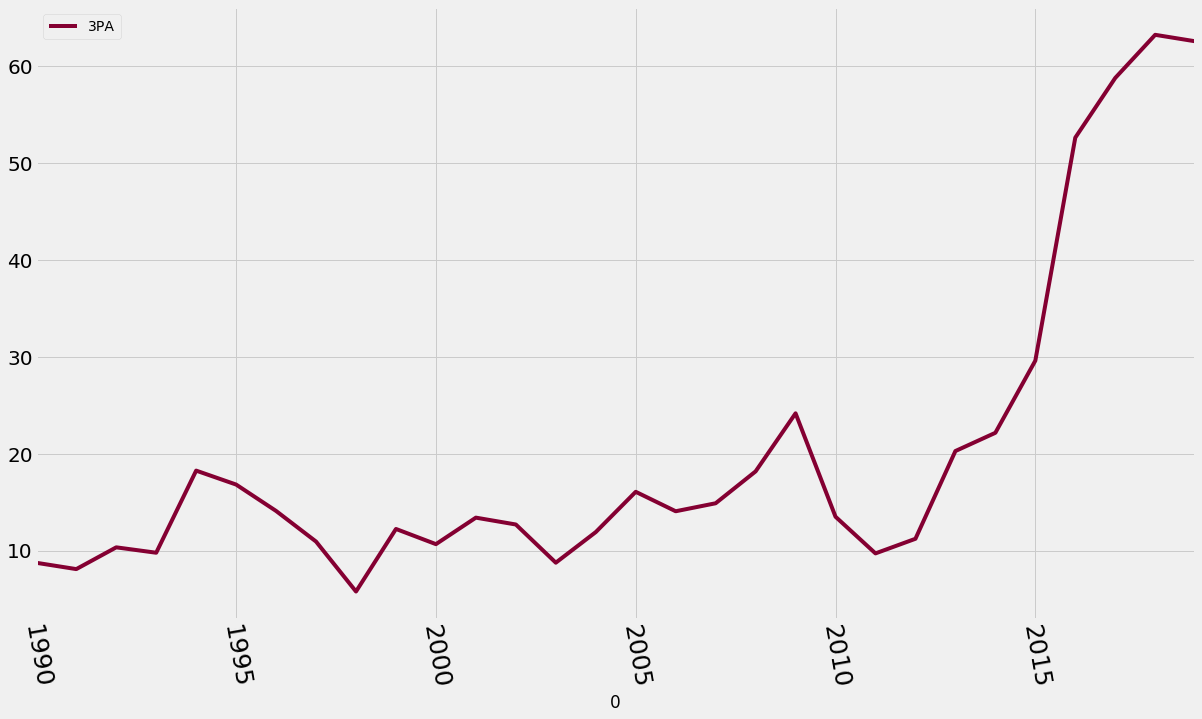

In [164]:
cht.plot.line(x=0,y=1,color='#840032')
plt.xticks(rotation=-80)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.legend(['3PA'])
# plt.plot(x,yvals,'#A8201A')

In [173]:
from selenium import webdriver

In [ ]:
col=['Player', 'Team', 'GP', 'W', 'L', 'MIN', 'REB', 'ContestedREB',
       'ContestedREB%', 'REBChances', 'REBChance%', 'DeferredREBChances',
       'AdjustedREBChance%', 'AVGREBDistance']

In [235]:
y_avgd={}

In [314]:


driver = webdriver.Chrome()
driver.get('https://stats.nba.com/players/rebounding/?Season=2018-19&SeasonType=Regular%20Season&OpponentTeamID=1610612743&sort=TEAM_ABBREVIATION&dir=-1')
html_text=driver.page_source
time.sleep(3.5)
driver.close()
soup = BeautifulSoup(html_text,'html.parser')
html = soup.find(name='div',attrs={'class':'nba-stat-table'})
reb = pd.read_html(str(html))[0]
reb.columns=col
reb = reb[reb['Team']=='ATL']
avg = reb['AVGREBDistance'].mean()


In [315]:
avg

6.85

In [316]:
y_avgd['DEN']=avg

In [302]:
del y_avgd['DET']

In [317]:
pd.DataFrame(y_avgd.items())

,0,1
0,HOU,7.376923
1,SAS,7.092308
2,LAC,6.309091
3,IND,6.652941
4,DEN,6.850000


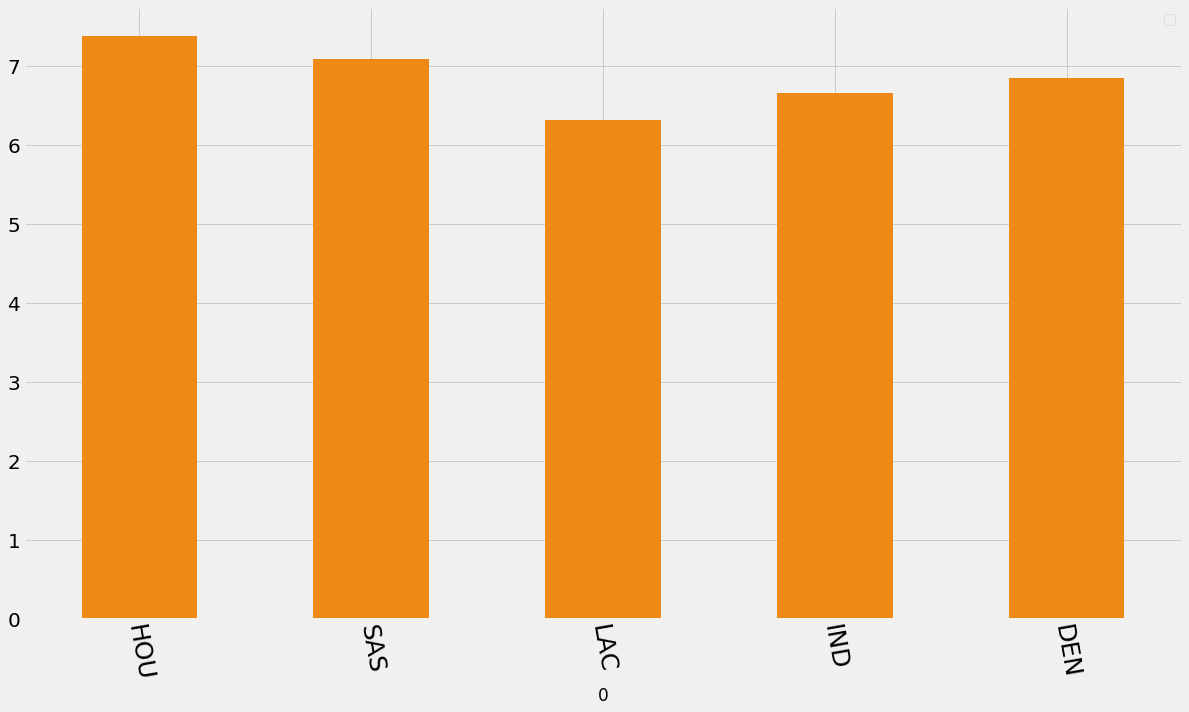

In [318]:
pd.DataFrame(y_avgd.items()).plot.bar(x=0,y=1,color='#EF8A17')
plt.xticks(rotation=-80)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.legend([])

In [206]:
import time

In [221]:
tm = set(center['Tm'])

In [232]:
miss_3pa={}

In [233]:
for t in tm:
    web = requests.get('https://www.basketball-reference.com/play-index/event_finder.cgi?request=1&event_code=fg3x&year_id=2019&is_playoffs=N&team_id='+t)
    content = web.content
    soup = BeautifulSoup(content,'html.parser')
    try:
        txt = soup.find(name='td',attrs={'class':'right'}).text
        miss_3pa[t]=int(txt)
    except AttributeError:
        pass

KeyboardInterrupt: 

In [234]:
miss_3pa

{'NOH': 1607,
 'DAL': 1980,
 'MIN': 1530,
 'LAC': 1297,
 'CLE': 1541,
 'GSW': 1737,
 'DET': 1861,
 'SAS': 1259,
 'ATL': 1967,
 'NJN': 1918,
 'MIL': 2029,
 'DEN': 1668,
 'SAC': 1528,
 'WAS': 1801,
 'UTA': 1796,
 'HOU': 2398,
 'PHI': 1585,
 'NYK': 1598,
 'MIA': 1730,
 'MEM': 1557,
 'ORL': 1696,
 'LAL': 1694,
 'POR': 1616,
 'IND': 1302,
 'TOR': 1756,
 'OKC': 1745,
 'CHI': 1378,
 'PHO': 1610}